# Create dataset
We start considering the Macrozone NORD

In [106]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add the source directory to the system path
sys.path.append(os.path.abspath('../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SEGNO_QH" 
qh = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
qh = qh.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
qh = qh[['MACROZONA', 'ORAINI', 'SBIL_MWH']]
# Convert ORAINI to datetime using the correct method
qh['ORAINI'] = pd.to_datetime(qh['ORAINI'], format='%Y%m%d%H%M')
qh.set_index('ORAINI', inplace=True)
# Nord
qh_nord = qh[qh['MACROZONA'] == 'NORD']
qh_nord = qh_nord.drop(columns = ['MACROZONA'])

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


In [107]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_ENERGY_BALANCE" 
power = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power = power.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
power = power[['ENERGY_BALANCE_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')
power.set_index('ORAINI', inplace=True)
thermo = utils.filter_and_rename_energy_source(power, 'Thermal', 'THERMO_GWH')
wind = utils.filter_and_rename_energy_source(power, 'Wind', 'WIND_GWH')
solar = utils.filter_and_rename_energy_source(power, 'Photovoltaic', 'SOLAR_GWH')
hydro = utils.filter_and_rename_energy_source(power, 'Hydro', 'HYDRO_GWH')
geothermal = utils.filter_and_rename_energy_source(power, 'Geothermal', 'GEO_GWH')
forex = utils.filter_and_rename_energy_source(power, 'Net Foreign Exchange', 'FOREX_GWH')

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


In [108]:
# Resample the data to 15-minute intervals and divide by 4
wind = wind.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
wind['WIND_GWH'] = wind['WIND_GWH'] / 4
wind['WIND_MWH'] = wind['WIND_GWH'] * 1000
# Drop the original hourly GWh column
wind = wind.drop(columns=['WIND_GWH'])

wind

,WIND_MWH
ORAINI,
2019-01-01 00:00:00,1275.0
2019-01-01 00:15:00,1275.0
2019-01-01 00:30:00,1275.0
2019-01-01 00:45:00,1275.0
2019-01-01 01:00:00,1257.5
...,...
2024-10-27 22:00:00,182.5
2024-10-27 22:15:00,182.5
2024-10-27 22:30:00,182.5


In [109]:
# Resample the data to 15-minute intervals and divide by 4
solar = solar.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
solar['SOLAR_GWH'] = solar['SOLAR_GWH'] / 4
solar['SOLAR_MWH'] = solar['SOLAR_GWH'] * 1000
# Drop the original hourly GWh column
solar = solar.drop(columns=['SOLAR_GWH'])

solar

,SOLAR_MWH
ORAINI,
2019-01-01 00:00:00,0.0
2019-01-01 00:15:00,0.0
2019-01-01 00:30:00,0.0
2019-01-01 00:45:00,0.0
2019-01-01 01:00:00,0.0
...,...
2024-10-27 22:00:00,0.0
2024-10-27 22:15:00,0.0
2024-10-27 22:30:00,0.0


In [110]:
# Resample the data to 15-minute intervals and divide by 4
thermo = thermo.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
thermo['THERMO_GWH'] = thermo['THERMO_GWH'] / 4
thermo['THERMO_MWH'] = thermo['THERMO_GWH'] * 1000
# Drop the original hourly GWh column
thermo = thermo.drop(columns=['THERMO_GWH'])

thermo

,THERMO_MWH
ORAINI,
2019-01-01 00:00:00,3337.5
2019-01-01 00:15:00,3337.5
2019-01-01 00:30:00,3337.5
2019-01-01 00:45:00,3337.5
2019-01-01 01:00:00,3272.5
...,...
2024-10-27 22:00:00,2180.0
2024-10-27 22:15:00,2180.0
2024-10-27 22:30:00,2180.0


In [111]:
# Resample the data to 15-minute intervals and divide by 4
hydro = hydro.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
hydro['HYDRO_GWH'] = hydro['HYDRO_GWH'] / 4
hydro['HYDRO_MWH'] = hydro['HYDRO_GWH'] * 1000
# Drop the original hourly GWh column
hydro = hydro.drop(columns=['HYDRO_GWH'])

hydro

,HYDRO_MWH
ORAINI,
2019-01-01 00:00:00,515.0
2019-01-01 00:15:00,515.0
2019-01-01 00:30:00,515.0
2019-01-01 00:45:00,515.0
2019-01-01 01:00:00,437.5
...,...
2024-10-27 22:00:00,1870.0
2024-10-27 22:15:00,1870.0
2024-10-27 22:30:00,1870.0


In [112]:
# Resample the data to 15-minute intervals and divide by 4
geothermal = geothermal.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
geothermal['GEO_GWH'] = geothermal['GEO_GWH'] / 4
geothermal['GEO_MWH'] = geothermal['GEO_GWH'] * 1000
# Drop the original hourly GWh column
geothermal = geothermal.drop(columns=['GEO_GWH'])

geothermal

,GEO_MWH
ORAINI,
2019-01-01 00:00:00,167.5
2019-01-01 00:15:00,167.5
2019-01-01 00:30:00,167.5
2019-01-01 00:45:00,167.5
2019-01-01 01:00:00,167.5
...,...
2024-10-27 22:00:00,140.0
2024-10-27 22:15:00,140.0
2024-10-27 22:30:00,140.0


In [113]:
## Resample the data to 15-minute intervals and divide by 4
#forex = forex.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
#forex['FOREX_GWH'] = forex['FOREX_GWH'] / 4
#forex['FOREX_MWH'] = forex['FOREX_GWH'] * 1000
# Drop the original hourly GWh column
#forex = forex.drop(columns=['FOREX_GWH'])

#forex

In [114]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_PHYSICAL_FOREIGN_FLOW" 
physical_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
physical_forex = physical_forex.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
physical_forex = physical_forex[['PHYSICAL_FOREIGN_FLOW_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
physical_forex['ORAINI'] = pd.to_datetime(physical_forex['ORAINI'], format='%Y%m%d%H%M')
physical_forex.set_index('ORAINI', inplace=True)

physical_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,PHYSICAL_FOREIGN_FLOW_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,156.0,Austria
2019-01-01 00:00:00,-142.0,Corsica
2019-01-01 00:00:00,-321.0,France
2019-01-01 00:00:00,-313.0,Greece
2019-01-01 00:00:00,-80.0,Malta
...,...,...
2024-10-27 23:00:00,3399.0,France
2024-10-27 23:00:00,498.0,Greece
2024-10-27 23:00:00,-93.0,Malta


In [115]:
austria_physical = utils.process_foreign_exchange(physical_forex, 'Austria')
corsica_physical = utils.process_foreign_exchange(physical_forex, 'Corsica')
france_physical = utils.process_foreign_exchange(physical_forex, 'France')
greece_physical = utils.process_foreign_exchange(physical_forex, 'Greece')
malta_physical = utils.process_foreign_exchange(physical_forex, 'Malta')
slovenia_physical = utils.process_foreign_exchange(physical_forex, 'Slovenia')
switzerland_physical = utils.process_foreign_exchange(physical_forex, 'Switzerland')
montenegno_physical = utils.process_foreign_exchange(physical_forex, 'Montenegno')

In [116]:
# SQL query to fetch data
sql_query = "SELECT * FROM GME_MGP_MI_QUANTITA" 
volumes = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
volumes = volumes.sort_values(by=['FLOWDATE','FLOWHOUR'])
# Convert FLOWDATE to a string and then to datetime (YYYYMMDD format)
volumes['FLOWDATE'] = pd.to_datetime(volumes['FLOWDATE'].astype(str), format='%Y%m%d')
# Subtracting one hour from FLOWHOUR
volumes['FLOWHOUR'] = volumes['FLOWHOUR'] - 1
# Convert FLOWHOUR to timedelta (number of hours) and add it to FLOWDATE
volumes['ORAINI'] = volumes['FLOWDATE'] + pd.to_timedelta(volumes['FLOWHOUR'], unit='h')
# Dropping the old FLOWDATE and FLOWHOUR columns
volumes = volumes.drop(columns=['FLOWDATE', 'FLOWHOUR'])
volumes.set_index('ORAINI', inplace=True)

mgp_volumes = volumes[volumes['MARKET'] == 'MGP']
mgp_volumes = mgp_volumes.drop(columns=['MARKET'])

mgp_volumes

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,TOTAL_PURCHASES,NAT_PURCHASES,CNOR_PURCHASES,CSUD_PURCHASES,NORD_PURCHASES,SARD_PURCHASES,SICI_PURCHASES,SUD_PURCHASES,AUST_PURCHASES,BRNN_PURCHASES,...,ROSN_SALES,SLOV_SALES,SVIZ_SALES,BSP_SALES,MALT_SALES,XAUS_SALES,XFRA_SALES,TOTITABSP_SALES,TOTITABSP_PURCHASES,LOADTIME
ORAINI,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,23521.449,24243.696,2372.707,4174.117,11460.324,901.738,1679.169,2148.394,0.0,None,...,1843.786,0.0,2438.0,0.0,0.0,187.0,0.0,24056.696,23730.449,2018-12-31 13:51:37.097
2019-01-01 01:00:00,22417.488,23396.353,2245.300,3885.330,10964.464,861.702,1571.783,2015.909,0.0,None,...,1845.050,0.0,2342.0,0.0,0.0,187.0,0.0,23209.353,22588.488,2018-12-31 13:51:37.097
2019-01-01 02:00:00,21496.678,22353.623,2145.655,3606.687,10604.767,829.694,1474.098,1888.777,0.0,None,...,1845.647,0.0,2175.0,0.0,0.0,0.0,0.0,22353.623,22057.240,2018-12-31 13:51:37.097
2019-01-01 03:00:00,20322.418,20576.217,2050.474,3392.350,10234.366,805.191,1401.924,1804.113,0.0,None,...,983.111,0.0,2310.0,0.0,0.0,0.0,0.0,20576.217,20468.106,2018-12-31 13:51:37.100
2019-01-01 04:00:00,19979.994,21238.994,2016.645,3314.058,10088.680,791.251,1366.832,1769.976,0.0,None,...,978.775,0.0,2351.0,433.0,0.0,187.0,0.0,21051.994,19979.994,2018-12-31 13:51:37.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 19:00:00,39244.437,40050.209,3285.522,7006.524,21549.341,999.381,2231.683,2384.454,0.0,None,...,NaN,0.0,2313.0,0.0,0.0,0.0,3140.0,36860.437,39871.437,2024-10-28 13:10:38.497
2024-10-29 20:00:00,36875.657,37552.457,2973.927,6490.671,20444.439,965.529,2134.670,2233.378,0.0,None,...,NaN,0.0,2723.0,0.0,0.0,0.0,3140.0,34413.125,37502.657,2024-10-28 13:10:38.497
2024-10-29 21:00:00,33537.854,33667.798,2711.348,5936.942,18812.771,896.464,1972.983,2098.597,0.0,None,...,NaN,0.0,3216.0,157.6,0.0,0.0,2981.0,30686.798,33537.854,2024-10-28 13:10:38.497


In [117]:
mgp_volumes_nord = mgp_volumes[['NORD_PURCHASES', 'NORD_SALES']].copy()
mgp_volumes_nord.rename(columns={"NORD_PURCHASES": "MGP_NORD_PURCHASES", "NORD_SALES": "MGP_NORD_SALES"}, inplace=True)
mgp_volumes_nord = mgp_volumes_nord[~mgp_volumes_nord.index.duplicated(keep='first')]
mgp_volumes_nord = mgp_volumes_nord.resample('15min').ffill()/4


mi1_volumes = volumes[volumes['MARKET'] == 'MI1']
mi1_volumes = mi1_volumes.drop(columns=['MARKET'])
mi1_volumes_nord = mi1_volumes[['NORD_PURCHASES', 'NORD_SALES']].copy()
mi1_volumes_nord.rename(columns={"NORD_PURCHASES": "MI1_NORD_PURCHASES", "NORD_SALES": "MI1_NORD_SALES"}, inplace=True)
mi1_volumes_nord = mi1_volumes_nord[~mi1_volumes_nord.index.duplicated(keep='first')]
mi1_volumes_nord = mi1_volumes_nord.resample('15min').ffill()/4

In [118]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE"
scheduled_internal = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_internal = scheduled_internal.sort_values(by='ORAINI')

# Filter the DataFrame for the relevant columns and rows
scheduled_internal = scheduled_internal[['SCHEDULED_INTERNAL_EXCHANGE_MW', 'ORAINI', 'FLOW_FROM', 'FLOW_TO']]
# Convert ORAINI to datetime using the correct method
scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')
scheduled_internal.set_index('ORAINI', inplace=True)
scheduled_internal = scheduled_internal[(scheduled_internal['FLOW_FROM'] == 'CNOR') & (scheduled_internal['FLOW_TO'] == 'NORD') ]
scheduled_internal = scheduled_internal.drop(columns=['FLOW_FROM','FLOW_TO'])
scheduled_internal_nord = scheduled_internal.resample('15min').ffill()/4

scheduled_internal_nord

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,SCHEDULED_INTERNAL_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,158.7875
2019-01-01 00:15:00,158.7875
2019-01-01 00:30:00,158.7875
2019-01-01 00:45:00,158.7875
2019-01-01 01:00:00,235.1475
...,...
2024-10-27 10:00:00,62.8000
2024-10-27 10:15:00,62.8000
2024-10-27 10:30:00,62.8000


In [119]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_TOTAL_LOAD_QH" 
total_load = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
total_load = total_load.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
total_load = total_load[['ZONA', 'TOTAL_LOAD_MW', 'FORECAST_TOTAL_LOAD_MW', 'ORAINI']]
# Convert ORAINI to datetime using the correct method
total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')
total_load.set_index('ORAINI', inplace=True)
subset_zonas = ['NORD']
mnord_load = utils.filter_load_by_zona(total_load, subset_zonas)
mnord_load = mnord_load.drop(columns=['ZONA'])
mnord_load

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11776.405,12085.191
2019-01-01 00:15:00,11723.369,12010.132
2019-01-01 00:30:00,11771.133,11984.692
2019-01-01 00:45:00,11740.606,11935.066
2019-01-01 01:00:00,11559.374,11825.838
...,...,...
2024-10-27 22:45:00,10883.209,11127.100
2024-10-27 23:00:00,13733.051,13941.349
2024-10-27 23:15:00,13546.742,13798.095


In [120]:
from functools import reduce
# List of all the DataFrames to be merged
dataframes = [qh_nord, wind, thermo, solar, hydro, geothermal, austria_physical, france_physical, slovenia_physical, switzerland_physical, scheduled_internal_nord, mgp_volumes_nord, mi1_volumes_nord, mnord_load]
# Use reduce to merge all DataFrames on 'ORAINI'
df_nord = reduce(lambda left, right: pd.merge(left, right, on='ORAINI', how='outer'), dataframes)

df_nord.head(35)

,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.50,369.50,158.7875,2865.08100,2294.92325,206.93800,258.15700,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.50,369.50,158.7875,2865.08100,2294.92325,206.93800,258.15700,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.50,369.50,158.7875,2865.08100,2294.92325,206.93800,258.15700,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.50,369.50,158.7875,2865.08100,2294.92325,206.93800,258.15700,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.50,292.00,235.1475,2741.11600,2086.04475,224.06475,297.12300,11559.374,11825.838
2019-01-01 01:15:00,-20.155,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.50,292.00,235.1475,2741.11600,2086.04475,224.06475,297.12300,11305.205,11578.414
2019-01-01 01:30:00,-26.199,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.50,292.00,235.1475,2741.11600,2086.04475,224.06475,297.12300,11204.909,11449.073
2019-01-01 01:45:00,-1.017,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.50,292.00,235.1475,2741.11600,2086.04475,224.06475,297.12300,11105.863,11309.938
2019-01-01 02:00:00,-65.036,1265.0,3105.0,0.0,417.5,167.5,36.75,-125.75,162.25,234.00,343.0975,2651.19175,1919.79425,297.14825,320.88175,10916.388,11161.389


In [121]:
df_nord.tail(25)

,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2024-10-29 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5351.60350,5392.45675,NaN,NaN,NaN,NaN
2024-10-29 17:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5351.60350,5392.45675,NaN,NaN,NaN,NaN
2024-10-29 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5351.60350,5392.45675,NaN,NaN,NaN,NaN
2024-10-29 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5351.60350,5392.45675,NaN,NaN,NaN,NaN
2024-10-29 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5431.47875,5396.12500,NaN,NaN,NaN,NaN
2024-10-29 18:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5431.47875,5396.12500,NaN,NaN,NaN,NaN
2024-10-29 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5431.47875,5396.12500,NaN,NaN,NaN,NaN
2024-10-29 18:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5431.47875,5396.12500,NaN,NaN,NaN,NaN
2024-10-29 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5387.33525,5216.58525,NaN,NaN,NaN,NaN


In [122]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_nord.columns if feature != TARGET]

df_nord = df_nord.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_nord[FEATURES], df_nord[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

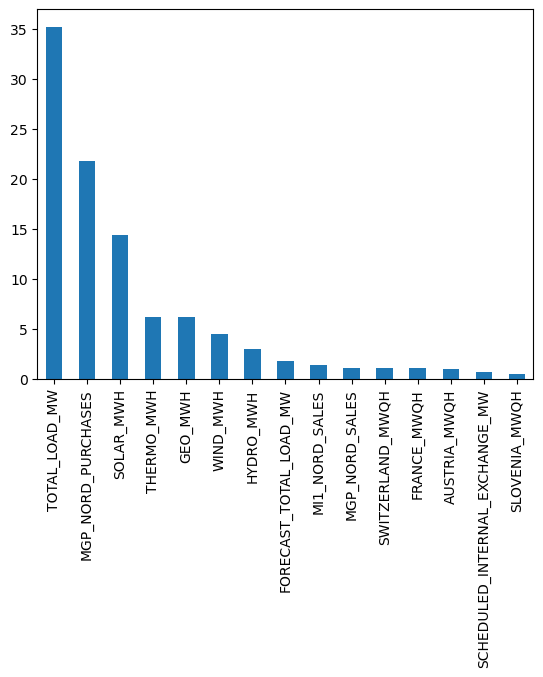

In [123]:
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()

## TEST 1: Probabilistic forecasting IQN

In [124]:
import sys
print(sys.executable)

c:\Users\samueledelia\.conda\envs\myenv\python.exe


In [125]:
# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Remove duplicates by keeping the first occurrence
df_nord_unique = df_nord[~df_nord.index.duplicated(keep='first')]

# Display duplicate timestamps
print(duplicate_timestamps)

                     SBIL_MWH  WIND_MWH  THERMO_MWH  SOLAR_MWH  HYDRO_MWH  \
ORAINI                                                                      
2019-03-31 00:00:00   181.921     295.0      3590.0        0.0      532.5   
2019-03-31 00:00:00    78.459     295.0      3590.0        0.0      532.5   
2019-03-31 00:15:00   100.132     295.0      3590.0        0.0      532.5   
2019-03-31 00:15:00   104.462     295.0      3590.0        0.0      532.5   
2019-03-31 00:30:00   156.216     295.0      3590.0        0.0      532.5   
2019-03-31 00:30:00   133.717     295.0      3590.0        0.0      532.5   
2019-03-31 00:45:00   133.798     295.0      3590.0        0.0      532.5   
2019-03-31 00:45:00   -34.008     295.0      3590.0        0.0      532.5   
2019-10-27 02:00:00     6.815     197.5      2950.0        0.0      737.5   
2019-10-27 02:00:00    62.855     197.5      2950.0        0.0      737.5   
2019-10-27 02:15:00    73.037     197.5      2950.0        0.0      737.5   

In [126]:
df_nord_unique

,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.50,158.7875,2865.08100,2294.92325,206.93800,258.1570,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.50,158.7875,2865.08100,2294.92325,206.93800,258.1570,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.50,158.7875,2865.08100,2294.92325,206.93800,258.1570,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.50,158.7875,2865.08100,2294.92325,206.93800,258.1570,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.5,292.00,235.1475,2741.11600,2086.04475,224.06475,297.1230,11559.374,11825.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27 10:00:00,-5.237,265.0,1825.0,1840.0,1722.5,145.0,39.00,471.00,164.0,-376.50,62.8000,3552.53025,2855.05800,91.88900,194.8125,15250.260,15558.201
2024-10-27 10:15:00,126.537,265.0,1825.0,1840.0,1722.5,145.0,39.00,471.00,164.0,-376.50,62.8000,3552.53025,2855.05800,91.88900,194.8125,15148.754,15667.862
2024-10-27 10:30:00,111.711,265.0,1825.0,1840.0,1722.5,145.0,39.00,471.00,164.0,-376.50,62.8000,3552.53025,2855.05800,91.88900,194.8125,15129.094,15539.353


# Test 1: FFNN

In [127]:
#import tensorflow as tf
#print(tf.__version__)
import numpy as np

In [129]:
# Separate features (covariates) and target
X = df_nord.drop(columns=['SBIL_MWH'])
y = df_nord['SBIL_MWH']

# Separate features (covariates) and target
past_covariates = df_nord[['WIND_MWH', 'THERMO_MWH', 'SOLAR_MWH', 'HYDRO_MWH', 
                            'GEO_MWH', 'AUSTRIA_MWQH', 'FRANCE_MWQH', 
                            'SLOVENIA_MWQH', 'SWITZERLAND_MWQH', 'SCHEDULED_INTERNAL_EXCHANGE_MW',
                            'TOTAL_LOAD_MW']]
future_covariates = df_nord[['FORECAST_TOTAL_LOAD_MW', 'MGP_NORD_PURCHASES', 'MGP_NORD_SALES', 'MI1_NORD_PURCHASES', 'MI1_NORD_SALES']]
target = df_nord['SBIL_MWH']

# Convert to numpy arrays
past_covariates = past_covariates.values
future_covariates = future_covariates.values
target = target.values

# Prepare the data: Creating windows for past covariates and aligning future covariates
def create_dataset(past_data, future_data, target_data, past_window=1):
    X_past, X_future, y = [], [], []
    
    # Loop to create dataset with proper alignment
    for i in range(past_window, len(target_data)):
        # Ensure that past data only includes values up to time i-1
        past_slice = past_data[i - past_window:i]  # Take past values only
        future_value = future_data[i - 1] if (i - 1) < len(future_data) else None  # Get future data from one step back
        
        if future_value is not None:
            X_past.append(past_slice)
            X_future.append(future_value)  # Append future covariate for the next step
            y.append(target_data[i])       # Target value for current time step

    return np.array(X_past), np.array(X_future), np.array(y)


X_past, X_future, y = create_dataset(past_covariates, future_covariates, target)

print(np.shape(X_past))
X_past

(203119, 1, 11)


array([[[ 1275.    ,  3337.5   ,     0.    , ...,   369.5   ,
           158.7875, 11776.405 ]],

       [[ 1275.    ,  3337.5   ,     0.    , ...,   369.5   ,
           158.7875, 11723.369 ]],

       [[ 1275.    ,  3337.5   ,     0.    , ...,   369.5   ,
           158.7875, 11771.133 ]],

       ...,

       [[  265.    ,  1825.    ,  1840.    , ...,  -376.5   ,
            62.8   , 15148.754 ]],

       [[  265.    ,  1825.    ,  1840.    , ...,  -376.5   ,
            62.8   , 15129.094 ]],

       [[  265.    ,  1825.    ,  1840.    , ...,  -376.5   ,
            62.8   , 15315.957 ]]])